# Tutorial 1: Aprendizagem Não Supervisionada - Redução de Dimensionalidade e Clustering

**Aluno:** Ouhao Wu / Nº:123542 / Grupo: ANNS-9

---

**Dataset:** HCV Data (hcvdat0.csv)

---

## Índice 

*   [1. Introdução](#introducao)
    *   [1.1. Contexto do Dataset](#contexto-dataset)
    *   [1.2. Objetivo do Tutorial](#objetivo-tutorial)
    *   [1.3. Objetivo do Dataset](#objetivo-dataset)
*   [2. Carregamento e Exploração Inicial dos Dados](#carregamento-exploracao)
*   [3. Pré-processamento e Limpeza de Dados](#pre-processamento)
*   [4. Redução de Dimensionalidade](#reducao-dimensionalidade)
    *   [4.1. Análise de Componentes Principais (PCA)](#pca)
    *   [4.2. Visualização com t-SNE](#tsne)
    *   [4.3. Visualização com UMAP](#umap)
*   [5. Clustering](#clustering)
    *   [5.1. K-Means](#kmeans)
    *   [5.2. DBSCAN](#dbscan)
    *   [5.3. Clustering Hierárquico ](#Clustering_Hierárquico)
*   [6. Conclusão](#conclusoes)



---


<a id="introducao"></a>
## 1. Introdução

Este notebook documenta a análise realizada no âmbito do Tutorial 1 da cadeira de Aprendizagem Não Supervisionada. O foco principal é a aplicação de técnicas de redução de dimensionalidade e clustering para explorar e extrair insights de um dataset relacionado a dados de saúde.


<a id="contexto-dataset"></a>
### 1.1. Contexto do Dataset

O dataset utilizado neste tutorial é o **HCV dataset (hcvdat0.csv)**. Ele contém dados demográficos (idade, sexo) e resultados de 10 testes laboratoriais sanguíneos (ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT) de 615 indivíduos.

<small>
- <strong>ALB (Albumina)</strong>: Avalia a concentração de albumina no sangue, proteína importante para manter a pressão oncótica e indicador da função hepática e renal.

- <strong>ALP (Fosfatase Alcalina)</strong>: Mede os níveis da enzima fosfatase alcalina, sendo importante na deteção de doenças hepáticas, ósseas ou obstruções biliares.

- <strong>ALT (Alanina Aminotransferase)</strong>: Avalia danos hepáticos, pois níveis elevados indicam habitualmente lesões no fígado, como hepatite.

- <strong>AST (Aspartato Aminotransferase)</strong>: Enzima usada para avaliar lesões hepáticas, musculares ou cardíacas. Níveis elevados são indicativos de possíveis danos nesses tecidos.

- <strong>BIL (Bilirrubina)</strong>: Avalia o nível de bilirrubina, que pode indicar problemas hepáticos ou obstruções das vias biliares, resultante do metabolismo das células sanguíneas.

- <strong>CHE (Colinesterase)</strong>: Enzima produzida pelo fígado, cuja diminuição pode indicar danos hepáticos ou intoxicação química.

- <strong>CHOL (Colesterol)</strong>: Mede o nível total de colesterol sanguíneo, essencial para avaliar o risco cardiovascular e o metabolismo lipídico.

- <strong>CREA (Creatinina)</strong>: Indicador importante da função renal, sendo níveis elevados sugestivos de insuficiência renal.

- <strong>GGT (Gama-glutamiltransferase)</strong>: Enzima particularmente sensível a doenças hepáticas, obstruções das vias biliares ou consumo excessivo de álcool.

- <strong>PROT (Proteínas Totais)</strong>: Mede a quantidade total de proteínas no sangue, importante na avaliação nutricional e hepática, já que muitas proteínas plasmáticas são sintetizadas pelo fígado.
</small>


A população do dataset é composta por:
*   Dadores de Sangue saudáveis ('0=Blood Donor').
*   Pacientes diagnosticados com Hepatite C em diferentes estágios:
    *   '1=Hepatitis'
    *   '2=Fibrosis'
    *   '3=Cirrhosis'
*   Um grupo adicional classificado como '0s=suspect Blood Donor'.

O dataset apresenta valores ausentes (marcados como 'NA') em algumas das colunas de testes laboratoriais, exigindo tratamento durante o pré-processamento. A sua origem remonta a um estudo publicado por Hoffmann et al. (2018) sobre o uso de machine learning em diagnósticos laboratoriais.


<a id="objetivo-tutorial"></a>
### 1.2. Objetivo do Tutorial

O objetivo principal deste tutorial, conforme definido no guião, é aplicar técnicas de aprendizagem não supervisionada – especificamente **metodologias de redução de dimensionalidade** (como PCA, t-SNE, UMAP) e **técnicas de clustering** (como K-Means, DBSCAN , Clustering Hierárquico) – para explorar a estrutura inerente ao dataset HCV. Pretende-se:

1.  Realizar o pré-processamento necessário para garantir a qualidade dos dados.
2.  Utilizar a redução de dimensionalidade para visualizar os dados e potencialmente simplificá-los.
3.  Aplicar algoritmos de clustering para identificar grupos naturais de indivíduos com base nos seus perfis laboratoriais, sem usar a informação de diagnóstico ('Category') durante o processo de agrupamento.
4.  Analisar e interpretar os resultados obtidos, comparando os clusters encontrados com as categorias de diagnóstico originais para extrair insights significativos sobre os padrões nos dados.
5.  Documentar todo o processo, código, resultados e interpretações de forma clara e organizada neste Jupyter Notebook.


<a id="objetivo-dataset"></a>
### 1.3. Objetivo do Dataset 

Embora o nosso objetivo no tutorial seja aplicar técnicas não supervisionadas, o dataset HCV em si parece ter sido compilado com o objetivo de **investigar as relações entre os perfis laboratoriais e os diferentes estados de saúde relacionados com a Hepatite C**. Potenciais objetivos da recolha original destes dados poderiam incluir:

*   Identificar quais marcadores laboratoriais diferenciam melhor os dadores saudáveis dos pacientes com Hepatite C.
*   Verificar se os diferentes estágios da doença (Hepatite, Fibrose, Cirrose) apresentam perfis laboratoriais distintos.
*   Potencialmente desenvolver modelos (supervisionados, no contexto original) para auxiliar no diagnóstico ou estadiamento da doença com base nestes exames.



-
**Objetivo Implícito**: Embora seja aprendizagem não supervisionada (não usamos 'Category' para treinar), o objetivo final é ver se os clusters encontrados correspondem, de alguma forma, aos grupos conhecidos (Dador, Suspeito, Hepatite, Fibrose, Cirrose). Isto será crucial para a interpretação.


-
**Features**:
ID: Irrelevante para a análise, pode ser descartado ou usado como índice. A coluna "" no início parece ser o índice original do CSV.
Category: Variável categórica (nominal). Esta é a nossa "verdade de base" para interpretação posterior, mas não deve ser usada como feature na redução de dimensionalidade ou clustering.
Age: Numérica (inteira).
Sex: Categórica (binária: 'm', 'f'). Precisa ser codificada.
ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT: Numéricas (contínuas). Estas são as principais features laboratoriais.
Tamanho: 615 instâncias, 14 colunas no total (1 ID, 1 Categoria, 12 Features reais: Age, Sex, 10 lab values).
Valores Ausentes (Missing Values): Sim, confirmado nos metadados e visível nos dados (NA). As colunas afetadas são ALB, ALP, ALT, CHOL, PROT. Isto exige tratamento .
Tipos de Dados: Mistura de numéricos e categóricos.
Escala: As variáveis numéricas (Age e especialmente os testes laboratoriais) têm escalas muito diferentes (compare BIL com CREA ou GGT). Scaling será essencial .

Portanto, neste tutorial usaremos métodos *não supervisionados* para ver que estruturas emergem dos dados *sem* assumir estas categorias, e depois compararemos para ver o quão bem essas estruturas se alinham com os diagnósticos conhecidos.


---

In [3]:
# 1. Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.preprocessing import StandardScaler

<!-- Âncora para Carregamento e Exploração -->
<a id="carregamento-exploracao"></a>
## 2. Carregamento e Exploração Inicial dos Dados



In [4]:
# Configuração para exibir plots no notebook
%matplotlib inline
# Configuração opcional para melhor visualização dos plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) 


In [5]:
#  Carregar os dados
file_path = 'hcvdat0.csv' 
try:
    df = pd.read_csv(file_path, index_col=0, na_values='NA')
    print(f"Dataset '{file_path}' carregado com sucesso.")
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado. Verifique o caminho.")

Dataset 'hcvdat0.csv' carregado com sucesso.


In [6]:
#  Verificar carregamento inicial
print("\n--- Verificação Inicial do DataFrame ---")
print("\nPrimeiras 5 linhas:")
print(df.head())
print(f"\nDimensões do DataFrame (linhas, colunas): {df.shape}")


--- Verificação Inicial do DataFrame ---

Primeiras 5 linhas:
        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
1  12.1  69.0  
2  15.6  76.5  
3  33.2  79.3  
4  33.8  75.7  
5  29.9  68.7  

Dimensões do DataFrame (linhas, colunas): (615, 13)


In [7]:
#  Informações gerais sobre o DataFrame
print("\n--- Informações Gerais (Tipos de Dados, Valores Não Nulos) ---")
df.info()


--- Informações Gerais (Tipos de Dados, Valores Não Nulos) ---
<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [8]:
#  Estatísticas descritivas para colunas numéricas
print("\n--- Estatísticas Descritivas (Colunas Numéricas) ---")
print(df.describe())


--- Estatísticas Descritivas (Colunas Numéricas) ---
              Age         ALB         ALP         ALT         AST         BIL  \
count  615.000000  614.000000  597.000000  614.000000  615.000000  615.000000   
mean    47.408130   41.620195   68.283920   28.450814   34.786341   11.396748   
std     10.055105    5.780629   26.028315   25.469689   33.090690   19.673150   
min     19.000000   14.900000   11.300000    0.900000   10.600000    0.800000   
25%     39.000000   38.800000   52.500000   16.400000   21.600000    5.300000   
50%     47.000000   41.950000   66.200000   23.000000   25.900000    7.300000   
75%     54.000000   45.200000   80.100000   33.075000   32.900000   11.200000   
max     77.000000   82.200000  416.600000  325.300000  324.000000  254.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  605.000000   615.000000  615.000000  614.000000  
mean     8.196634    5.368099    81.287805   39.533171   72.044137  
std      

In [9]:
# Verificar valores ausentes (NaN)
print("\n--- Contagem de Valores Ausentes (NaN) por Coluna ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


--- Contagem de Valores Ausentes (NaN) por Coluna ---
ALB      1
ALP     18
ALT      1
CHOL    10
PROT     1
dtype: int64



--- Distribuição da Variável 'Category' ---
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


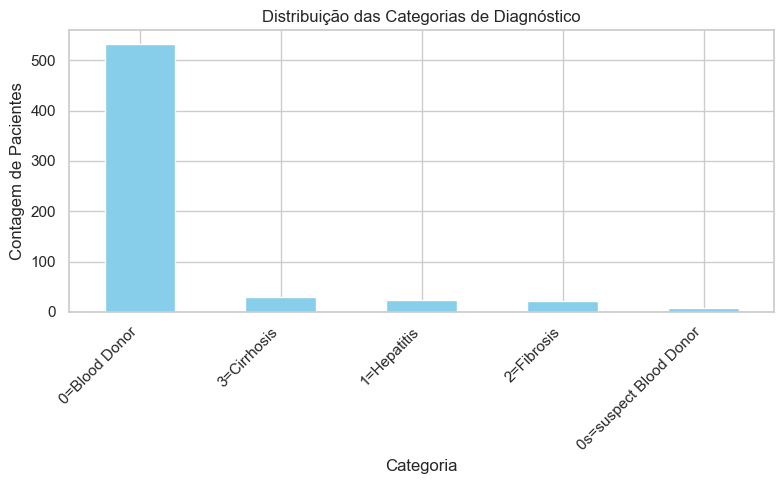

In [10]:
#  Distribuição da variável 'Category' (Alvo para interpretação posterior)
print("\n--- Distribuição da Variável 'Category' ---")
category_counts = df['Category'].value_counts()
print(category_counts)

# Plot da distribuição de 'Category'

plt.figure(figsize=(8, 5)) 
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Categorias de Diagnóstico')
plt.xlabel('Categoria')
plt.ylabel('Contagem de Pacientes')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


--- Distribuição da Variável 'Sex' ---
Sex
m    377
f    238
Name: count, dtype: int64


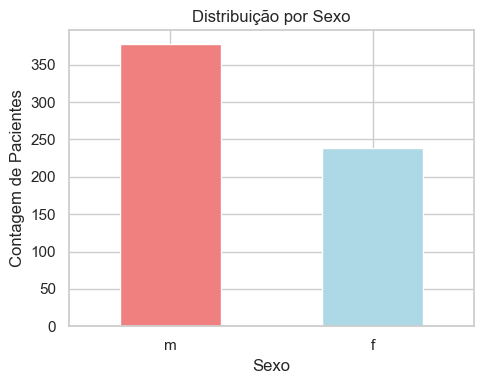

In [11]:
#  Distribuição da variável 'Sex'
print("\n--- Distribuição da Variável 'Sex' ---")
sex_counts = df['Sex'].value_counts()
print(sex_counts)

# Plot da distribuição de 'Sex'
plt.figure(figsize=(5, 4)) 
sex_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem de Pacientes')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()


--- Histogramas das Features Numéricas ---


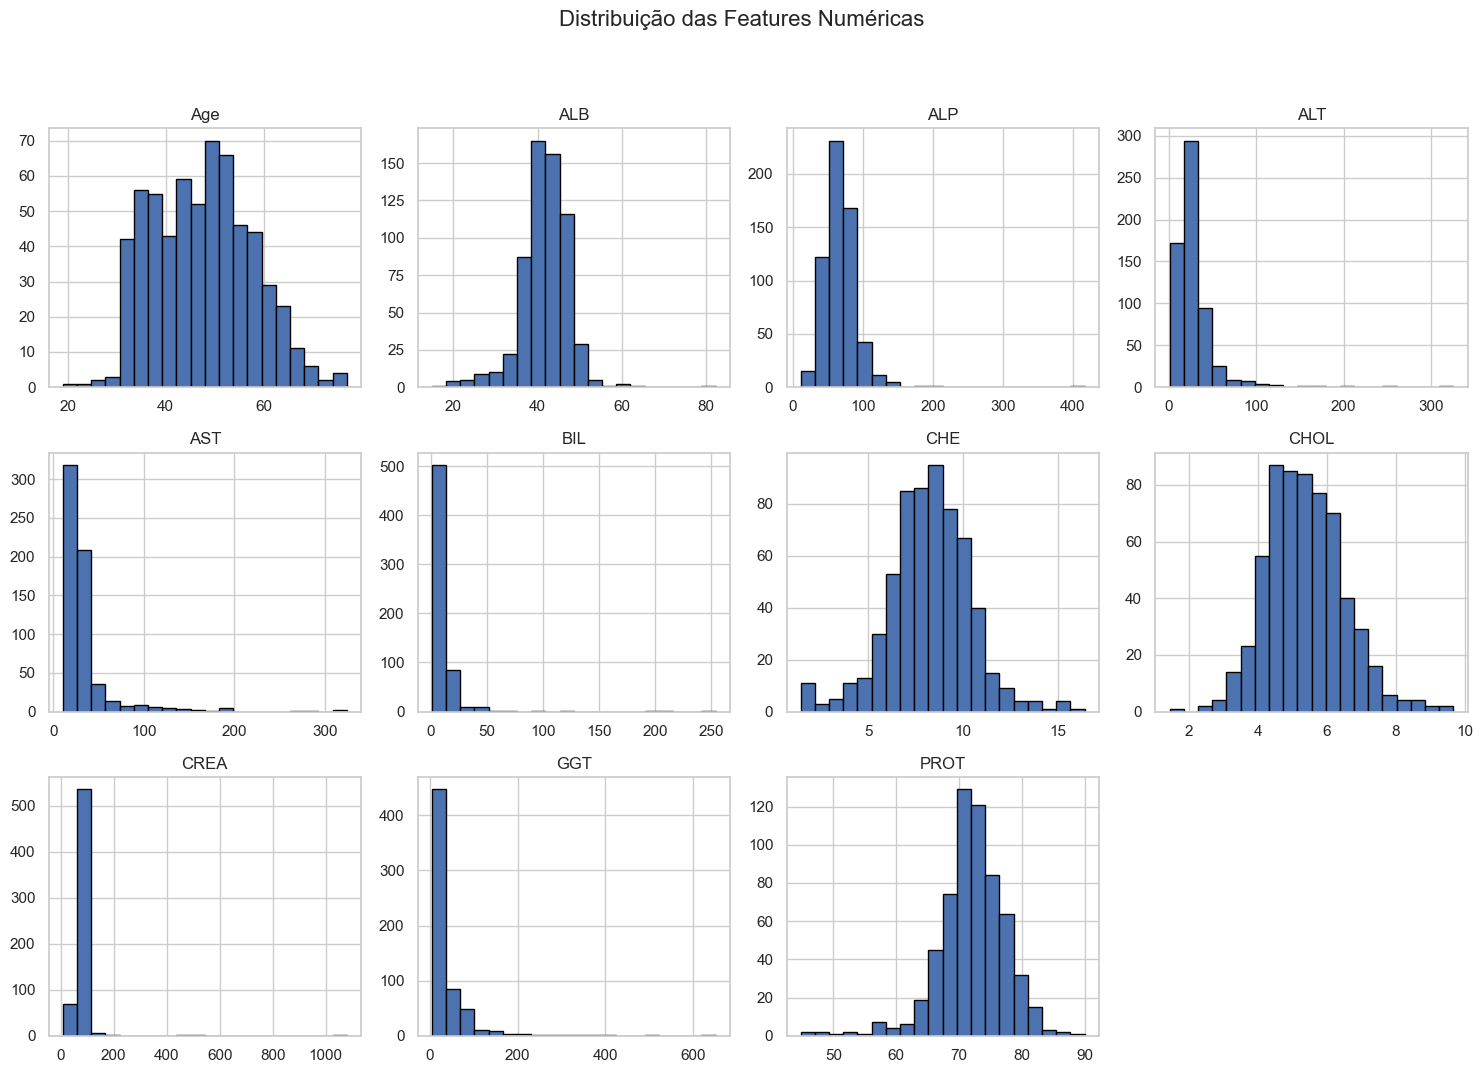


Fim da Exploração Inicial.


In [12]:
#  Visualizar distribuições das features 
print("\n--- Histogramas das Features Numéricas ---")
# Selecionar apenas colunas numéricas para os histogramas
numerical_features = df.select_dtypes(include=np.number)

# Verificar se existem features numéricas antes de plotar
if not numerical_features.empty:
    # Define um layout com 4 colunas
    num_cols = 4
    num_rows = (numerical_features.shape[1] + num_cols - 1) // num_cols # Calcula linhas necessárias

    numerical_features.hist(figsize=(15, num_rows * 3.5), bins=20, layout=(num_rows, num_cols), edgecolor='black')
    plt.suptitle('Distribuição das Features Numéricas', y=1.02, fontsize=16) # Título geral acima dos subplots
    plt.tight_layout(rect=[0, 0, 1, 0.98]) 
    plt.show()
else:
    print("Nenhuma feature numérica encontrada para plotar histogramas.")

print("\nFim da Exploração Inicial.")


<a id="pre-processamento"></a>
## 3. Pré-processamento e Limpeza de Dados



In [13]:
# Pré-processamento e Limpeza de Dados 
print("--- Iniciando Pré-processamento ---")

--- Iniciando Pré-processamento ---


In [14]:
#  Guardar 'Category' e criar DataFrame para processamento
if 'Category' in df.columns:
    y_true = df['Category'].copy()
    df_processed = df.drop('Category', axis=1).copy()
    print("Variável 'Category' guardada em 'y_true'.")
    print("DataFrame 'df_processed' criado sem a coluna 'Category'.")
    print(f"Dimensões de df_processed: {df_processed.shape}")
else:
    print("Aviso: Coluna 'Category' não encontrada. Continuando sem separá-la.")
    y_true = None 
    df_processed = df.copy() 

Variável 'Category' guardada em 'y_true'.
DataFrame 'df_processed' criado sem a coluna 'Category'.
Dimensões de df_processed: (615, 12)


In [15]:
#  Codificar 'Sex' usando One-Hot Encoding
if 'Sex' in df_processed.columns:
    
    print("\n--- Codificar Variável 'Sex' ---")
    
    # drop_first=True cria uma única coluna (ex: Sex_m) e evita multicolinearidade
    # dtype=int garante que os valores sejam 0 e 1
    
    df_processed = pd.get_dummies(df_processed, columns=['Sex'], drop_first=True, dtype=int)
    print("Coluna 'Sex' codificada (criada coluna 'Sex_m').")
    print(f"Novas dimensões de df_processed: {df_processed.shape}")
    print("Verificando as primeiras linhas após codificação:")
    print(df_processed.head())
else:
    print("\nAviso: Coluna 'Sex' não encontrada em df_processed.")


--- Codificar Variável 'Sex' ---
Coluna 'Sex' codificada (criada coluna 'Sex_m').
Novas dimensões de df_processed: (615, 12)
Verificando as primeiras linhas após codificação:
   Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT  Sex_m
1   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0      1
2   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5      1
3   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3      1
4   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7      1
5   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7      1


In [16]:
#  Tratar Valores Ausentes 
# Colunas que sabemos (da exploração anterior) que podem ter NaNs
cols_to_impute = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']

# Filtrar para garantir que estas colunas existem em df_processed
actual_cols_to_impute = [col for col in cols_to_impute if col in df_processed.columns and df_processed[col].isnull().any()]

if actual_cols_to_impute:
    print(f"\n--- Imputando Valores Ausentes com Mediana para: {actual_cols_to_impute} ---")
    imputer = SimpleImputer(strategy='median')

    # Aplicar o imputer APENAS às colunas selecionadas
    # O fit_transform retorna um array NumPy, que é atribuído de volta às colunas do DataFrame
    df_processed[actual_cols_to_impute] = imputer.fit_transform(df_processed[actual_cols_to_impute])

    # Verificar novamente os valores ausentes APÓS a imputação
    missing_after_impute = df_processed[actual_cols_to_impute].isnull().sum()
    if missing_after_impute.sum() == 0:
        print("Nenhum valor ausente nas colunas alvo após imputação.")
    else:
        print("Atenção! Ainda existem valores ausentes após imputação:")
        print(missing_after_impute[missing_after_impute > 0])
else:
    print("\nNenhuma das colunas alvo ('ALB', 'ALP', 'ALT', 'CHOL', 'PROT') necessita de imputação ou não existem.")

# Verificar NAs em todo o dataframe processado para ter certeza
total_missing_after = df_processed.isnull().sum().sum()
print(f"\nContagem total de NaNs em df_processed após imputação: {total_missing_after}")
if total_missing_after != 0:
     print("Atenção! Ainda existem valores ausentes em outras colunas não tratadas.")
     print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])


--- Imputando Valores Ausentes com Mediana para: ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT'] ---
Nenhum valor ausente nas colunas alvo após imputação.

Contagem total de NaNs em df_processed após imputação: 0


In [17]:
#  Feature Scaling (Padronização)
from sklearn.preprocessing import StandardScaler
print("\n--- Aplicando Feature Scaling (StandardScaler) ---")
# Selecionar todas as colunas que são numéricas neste ponto
numeric_cols = df_processed.select_dtypes(include=np.number).columns

if not numeric_cols.empty:
    print(f"Colunas a serem escaladas: {list(numeric_cols)}")
    scaler = StandardScaler()

    # Aplicar o scaler (fit e transform)
    scaled_features = scaler.fit_transform(df_processed[numeric_cols])

    print(f"Features escaladas com sucesso.")
    print(f"Shape do array NumPy 'scaled_features': {scaled_features.shape}")
    
    scaled_feature_names = list(numeric_cols)
    print(f"Nomes das features escaladas: {scaled_feature_names}")

    # Visualizar as primeiras linhas do array escalado
    print("\nPrimeiras 5 linhas das features escaladas (array NumPy):")
    print(scaled_features[:5])

    # Criar um DataFrame com as features escaladas (pode ser útil)
    df_scaled = pd.DataFrame(scaled_features, index=df_processed.index, columns=scaled_feature_names)
    print("\nPrimeiras 5 linhas do DataFrame escalado ('df_scaled'):")
    print(df_scaled.head())

else:
    print("Nenhuma coluna numérica encontrada para escalar.")
    scaled_features = None 
    df_scaled = None
    scaled_feature_names = []

print("\nFim do Pré-processamento.")


--- Aplicando Feature Scaling (StandardScaler) ---
Colunas a serem escaladas: ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Sex_m']
Features escaladas com sucesso.
Shape do array NumPy 'scaled_features': (615, 12)
Nomes das features escaladas: ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Sex_m']

Primeiras 5 linhas das features escaladas (array NumPy):
[[-1.53361617 -0.54073873 -0.61356554 -0.81567489 -0.38369306 -0.19823566
  -0.57473353 -1.90363366  0.49707027 -0.50228619 -0.56441905  0.79454373]
 [-1.53361617 -0.54073873  0.08105492 -0.41062855 -0.30505715 -0.38137514
   1.34916073 -0.5050767  -0.14658961 -0.43820313  0.82605409  0.79454373]
 [-1.53361617  0.91475496  0.25275885  0.30508439  0.5387666  -0.26945657
   0.29192639 -0.14875646  0.09478284 -0.11595686  1.34516406  0.79454373]
 [-1.53361617  0.27364465 -0.63307735  0.08486502 -0.36857077  0.38170602
  -0.39323407 -0.55852474 -0.02590339 -0.10497119 

<a id="reducao-dimensionalidade"></a>
## 4. Redução de Dimensionalidade

<a id="pca"></a>
### 4.1. Análise de Componentes Principais (PCA)

In [18]:
#  Analisar a Variância Explicada por todos os componentes possíveis
pca_exploratory = PCA()
pca_exploratory.fit(scaled_features)
# Calcular a variância explicada acumulada
explained_variance_ratio_cumulative = np.cumsum(pca_exploratory.explained_variance_ratio_)

print(f"\nVariância explicada por cada componente:")
print(pca_exploratory.explained_variance_ratio_)
print(f"\nVariância explicada acumulada:")
print(explained_variance_ratio_cumulative)


Variância explicada por cada componente:
[0.20514353 0.15826993 0.11816755 0.09537917 0.08165612 0.07723136
 0.06231129 0.05411641 0.04892183 0.03908729 0.0318743  0.02784122]

Variância explicada acumulada:
[0.20514353 0.36341346 0.48158101 0.57696018 0.6586163  0.73584766
 0.79815895 0.85227536 0.90119719 0.94028448 0.97215878 1.        ]


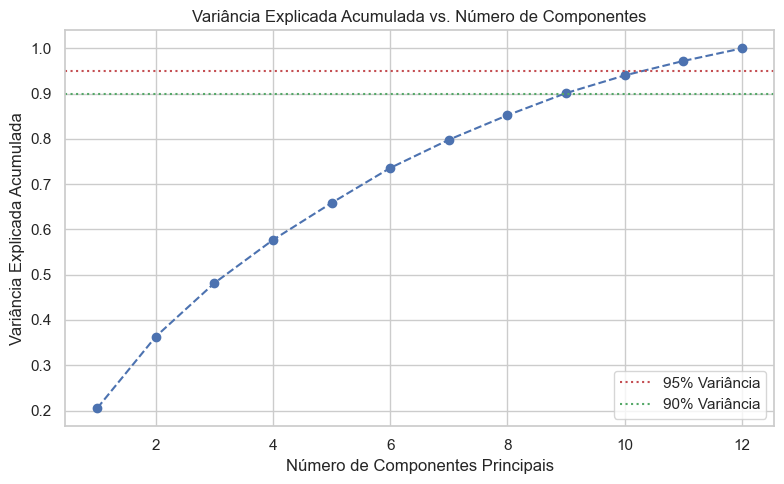

In [19]:
#  Plotar a Variância Explicada Acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada vs. Número de Componentes')
plt.grid(True)
# Adicionar linhas para limiares comuns (90%, 95%)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Variância')
plt.axhline(y=0.90, color='g', linestyle=':', label='90% Variância')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
#  Determinar o número de componentes para 95% de variância (exemplo)
variance_threshold = 0.95
n_components_95 = np.where(explained_variance_ratio_cumulative >= variance_threshold)[0][0] + 1
print(f"\nNúmero de componentes necessários para capturar >= {variance_threshold*100:.0f}% da variância: {n_components_95}")


Número de componentes necessários para capturar >= 95% da variância: 11


In [21]:
#  Aplicar PCA com n_components=2 (para visualização 2D)
print("\nAplicando PCA para reduzir para 2 componentes (para visualização)...")
pca_2d = PCA(n_components=2, random_state=42) # Adicionar random_state para reprodutibilidade se houver solvers estocásticos 
reduced_features_2d = pca_2d.fit_transform(scaled_features)

print(f"Shape dos dados reduzidos para 2D: {reduced_features_2d.shape}")
print(f"Variância explicada pelos 2 primeiros componentes: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")


Aplicando PCA para reduzir para 2 componentes (para visualização)...
Shape dos dados reduzidos para 2D: (615, 2)
Variância explicada pelos 2 primeiros componentes: 36.34%


In [22]:
# Criar um DataFrame com os resultados 2D para facilitar o plot com Seaborn
df_pca_2d = pd.DataFrame(data=reduced_features_2d, columns=['PC1', 'PC2'], index=df_processed.index)

if y_true is not None:
    df_pca_2d['Category'] = y_true

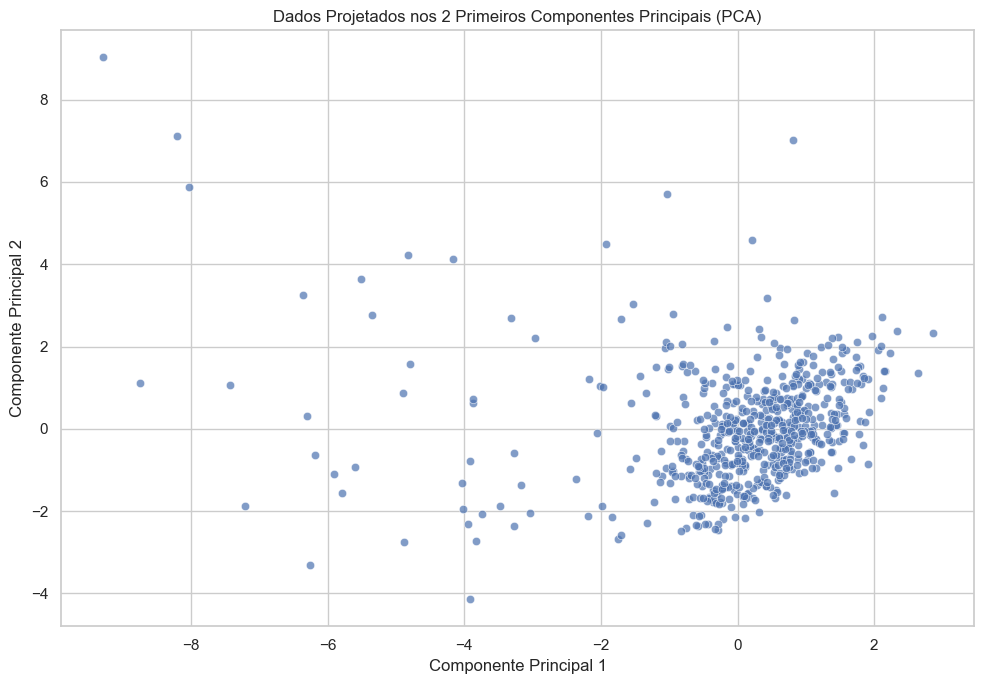

In [71]:
#  Visualização dos Dados Reduzidos (2D)
# Plot 1: Scatter plot sem cores
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', alpha=0.7)
plt.title('Dados Projetados nos 2 Primeiros Componentes Principais (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

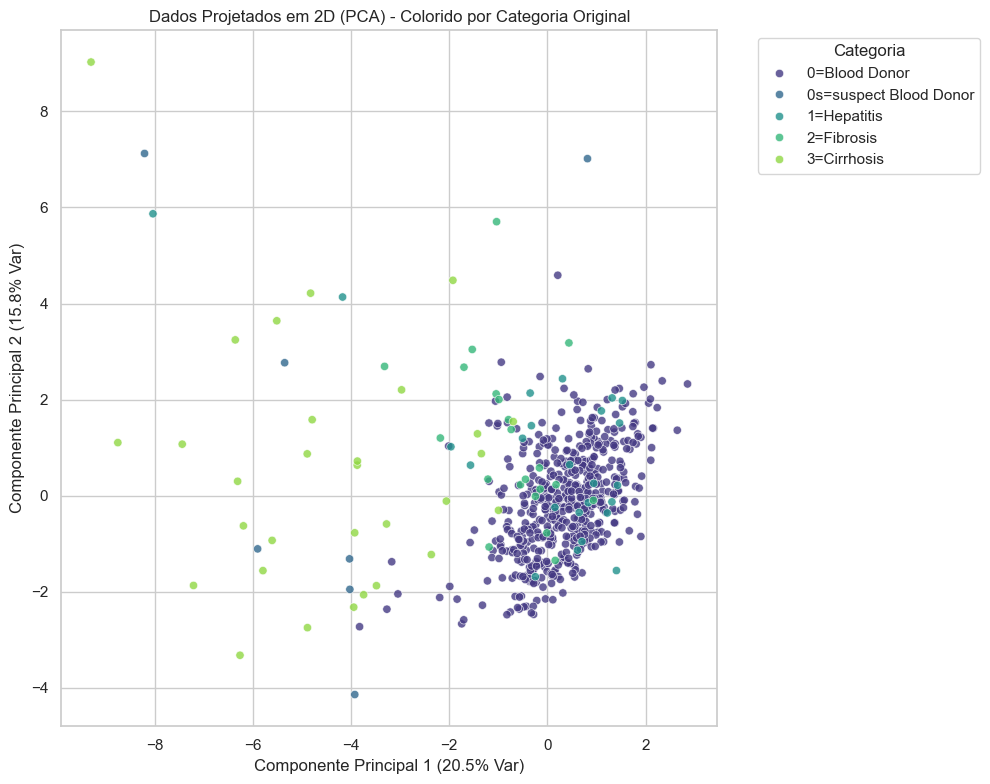

In [72]:
# Plot 2: Scatter plot colorido pela 'Category' 
if y_true is not None:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Category', alpha=0.8, palette='viridis') # 'viridis' é um bom colormap
    plt.title('Dados Projetados em 2D (PCA) - Colorido por Categoria Original')
    plt.xlabel(f'Componente Principal 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% Var)')
    plt.ylabel(f'Componente Principal 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% Var)')
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda fora do plot
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta para caber a legenda
    plt.show()
else:
    print("\nVariável 'y_true' não disponível, plot colorido por categoria não gerado.")

### PCA (Gráficos 1 & 2)

*   Projeta os dados nas direções de maior variância (apenas 36.3% explicada pelos 2 primeiros PCs).
*   Mostra **grande sobreposição** entre as categorias, especialmente 'Blood Donor' e 'suspect Blood Donor'.
*   **Ineficaz** na separação dos grupos, sugerindo que a estrutura de separação não é linear.

<a id="tsne"></a>
### 4.2. Visualização com t-SN

In [42]:
#  Visualização com t-SNE e UMAP 
if 'scaled_features' not in locals() or scaled_features is None:
    print("Array 'scaled_features' não encontrado. ")
if 'y_true' not in locals(): # y_true pode ser None
     print("Variável 'y_true' (Category) não encontrada, Plots coloridos por categoria não serão gerados.")
     y_true_exists = False
else:
     y_true_exists = True
     if 'df_processed' in locals(): # Usar o índice de df_processed se disponível
         plot_index = df_processed.index
     else: 
         plot_index = pd.RangeIndex(start=0, stop=len(scaled_features), step=1)


print("--- Iniciando Visualização com t-SNE e UMAP ---")

--- Iniciando Visualização com t-SNE e UMAP ---


In [43]:
try:
    import umap
except ImportError:
    print("*"*70)
    print("Biblioteca UMAP não encontrada. Para usar UMAP, instale-a:")
    print("pip install umap-learn")
    print("*"*70)
    umap = None 

In [73]:
#  Aplicar t-SNE 
print("\nAplicando t-SNE ")
# Parâmetros comuns:
# - n_components=2: Queremos visualização 2D.
# - perplexity: Relacionado com o número de vizinhos próximos. Valores típicos entre 5 e 50. Influencia o equilíbrio local/global.
# - n_iter: Número de iterações.
# - init='pca': Inicialização com PCA pode acelerar a convergência e dar resultados mais estáveis.
# - random_state: Para reprodutibilidade.
tsne = TSNE(n_components=2, perplexity=55, init='pca', n_iter=1550, random_state=40)
reduced_features_tsne = tsne.fit_transform(scaled_features)

print(f"Shape dos dados reduzidos com t-SNE: {reduced_features_tsne.shape}")


Aplicando t-SNE 


D:\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Shape dos dados reduzidos com t-SNE: (615, 2)


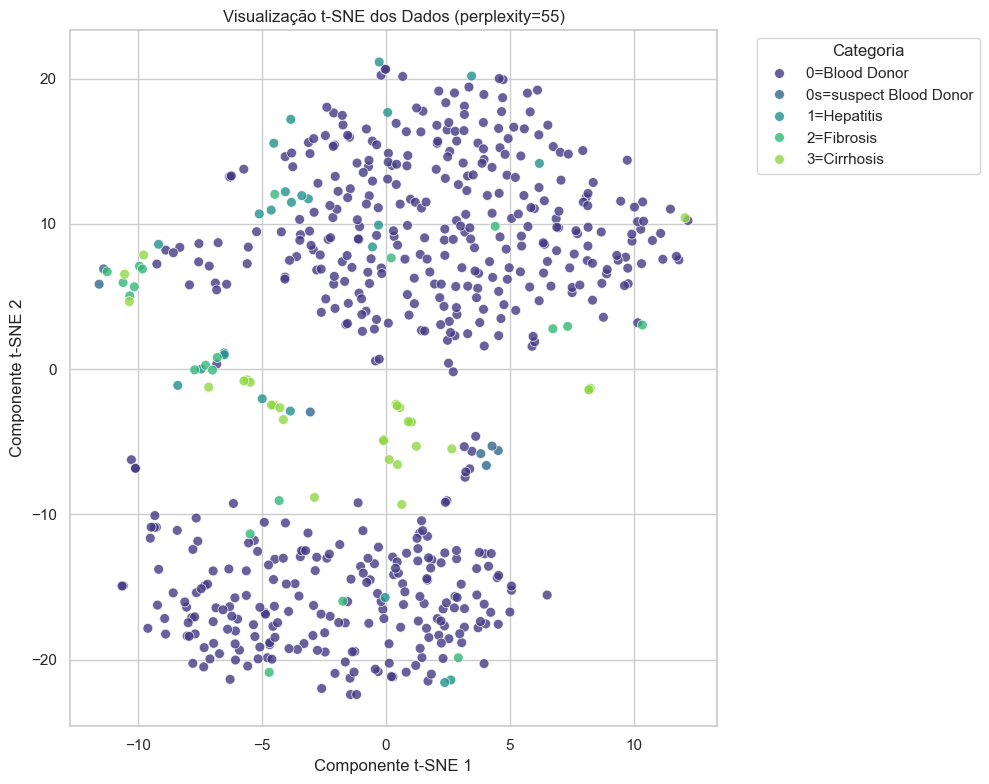

Nota: Em t-SNE, o tamanho dos clusters e a distância entre eles não são diretamente interpretáveis.
Foque-se nos agrupamentos dos pontos.


In [74]:
# Criar DataFrame para plot
df_tsne = pd.DataFrame(data=reduced_features_tsne, columns=['TSNE1', 'TSNE2'], index=plot_index)
if y_true_exists:
    df_tsne['Category'] = y_true
# Criar DataFrame para plot
df_tsne = pd.DataFrame(data=reduced_features_tsne, columns=['TSNE1', 'TSNE2'], index=plot_index)
if y_true_exists:
    df_tsne['Category'] = y_true

# Visualizar t-SNE
plt.figure(figsize=(12, 8))
if y_true_exists:
    sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Category', alpha=0.8, palette='viridis', s=50)
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
     sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', alpha=0.8, palette='viridis', s=50)

plt.title('Visualização t-SNE dos Dados (perplexity=55)')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1] if y_true_exists else [0, 0, 1, 1])
plt.show()
print("Nota: Em t-SNE, o tamanho dos clusters e a distância entre eles não são diretamente interpretáveis.")
print("Foque-se nos agrupamentos dos pontos.")

### t-SNE (`perplexity=55`) (Gráfico 3)

*   **Melhora significativamente** a separação em relação ao PCA, capturando estrutura não-linear.
*   Começa a formar **clusters mais distintos** para 'Fibrosis' e 'Cirrhosis'.
*   Ainda apresenta sobreposição considerável, focando mais na **estrutura local**.
*   `perplexity=55` é um valor comum que considera vizinhanças locais de tamanho moderado.

<a id="umap"></a>
### 4.3. Visualização com UMAP



Aplicando UMAP...


D:\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Shape dos dados reduzidos com UMAP: (615, 2)


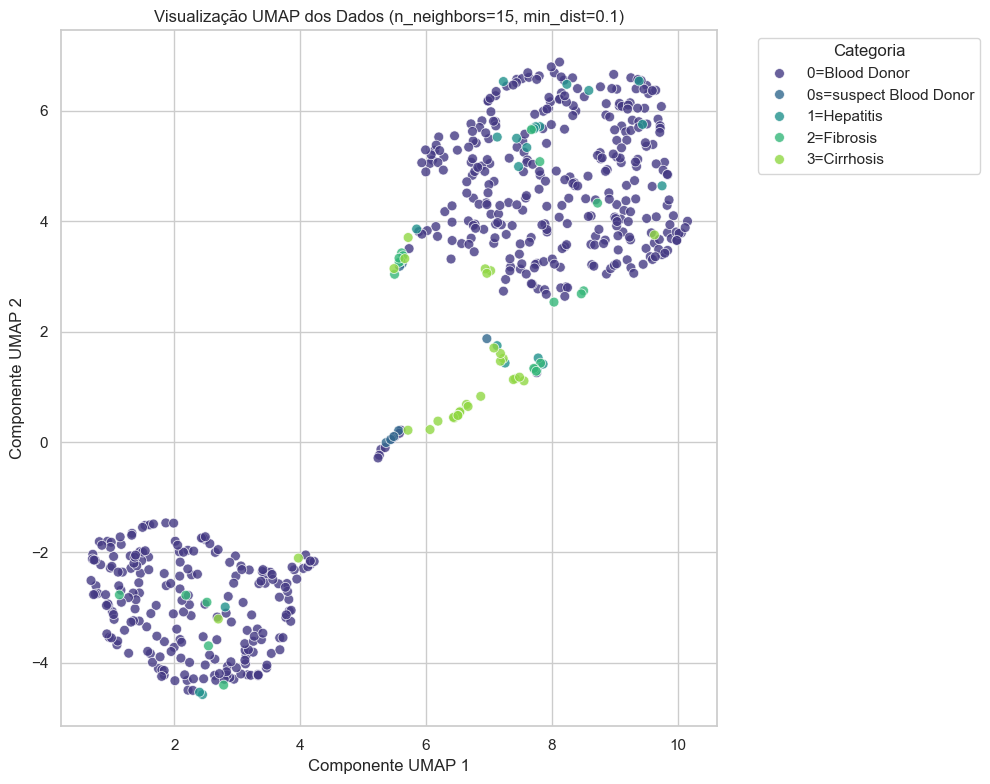

Nota: UMAP tende a preservar melhor a estrutura global dos dados que t-SNE,
mas a interpretação das distâncias ainda requer cuidado.

Fim do  Redução de Dimensionalidade.


In [75]:
#  Aplicar UMAP 
if umap:
    print("\n\nAplicando UMAP...")
    # Parâmetros comuns:
    # - n_neighbors: Controla o equilíbrio entre estrutura local e global Default 15
    # - min_dist: Controla quão agrupados os pontos ficam. Valores menores = clusters mais densos. Default 0.1
    # - n_components=2: Para visualização 2D
    # - metric: Métrica de distância (default 'euclidean')
    # - random_state: Para reprodutibilidade
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
    reduced_features_umap = umap_reducer.fit_transform(scaled_features)

    print(f"Shape dos dados reduzidos com UMAP: {reduced_features_umap.shape}")

    # Criar DataFrame para plot
    df_umap = pd.DataFrame(data=reduced_features_umap, columns=['UMAP1', 'UMAP2'], index=plot_index)
    if y_true_exists:
        df_umap['Category'] = y_true

    # Visualizar UMAP
    plt.figure(figsize=(12, 8))
    if y_true_exists:
        sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Category', alpha=0.8, palette='viridis', s=50)
        plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', alpha=0.8, palette='viridis', s=50)

    plt.title('Visualização UMAP dos Dados (n_neighbors=15, min_dist=0.1)')
    plt.xlabel('Componente UMAP 1')
    plt.ylabel('Componente UMAP 2')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1] if y_true_exists else [0, 0, 1, 1])
    plt.show()
    print("Nota: UMAP tende a preservar melhor a estrutura global dos dados que t-SNE,")
    print("mas a interpretação das distâncias ainda requer cuidado.")
    
print("\nFim do  Redução de Dimensionalidade.")

### UMAP (`n_neighbors=15`, `min_dist=0.1`) (Gráfico 4)

*   Oferece a **separação visual mais clara** e os **clusters mais compactos**.
*   Separa muito bem 'Fibrosis' e 'Cirrhosis' do grupo principal e entre si.
*   Parece **equilibrar melhor a estrutura local e global** neste caso.
*   `n_neighbors=15` (padrão) define a vizinhança local/global.
*   `min_dist=0.1` (baixo) força os clusters a serem mais densos e bem separados visualmente.

## Comparação das Visualizações (PCA, t-SNE, UMAP)
Tanto t-SNE quanto UMAP são superiores ao PCA para visualizar a separação destas categorias, demonstrando a natureza não-linear das diferenças entre os grupos.

Neste caso específico e com os hiperparâmetros escolhidos, **UMAP forneceu a visualização mais eficaz e interpretável**, com clusters mais distintos e melhor definidos.


### Relevância das Visualizações para os Objetivos do Dataset

As visualizações, especialmente **t-SNE e UMAP**, apoiam fortemente os objetivos inferidos do dataset:

1.  **Diferenciação Dador vs. Doente:** As técnicas não-lineares conseguiram separar visualmente o grupo principal de Dadores/Suspeitos dos pacientes com doenças hepáticas, confirmando que os marcadores laboratoriais contêm informação distintiva.
2.  **Distinção entre Estágios:** UMAP, em particular, mostrou clusters bem definidos para Fibrose e Cirrose, indicando que os perfis laboratoriais refletem a progressão da doença. Hepatite apareceu como um grupo mais intermediário ou disperso.
3.  **Potencial Preditivo:** A clara estrutura de agrupamento (embora não-linear) revelada por UMAP/t-SNE sugere que estes dados são adequados para treinar modelos supervisionados capazes de auxiliar no diagnóstico e estadiamento da doença hepática.




<a id="clustering"></a>
## 5. Clustering

<a id="kmeans"></a>
### 5.1 K-means

In [47]:
print("--- Iniciando Clustering com K-Means ---")

--- Iniciando Clustering com K-Means ---


In [76]:
# usar 'reduced_features_2d' (PC1, PC2) 
X_cluster = scaled_features
print(f"Dados a serem usados para clustering: array com shape {X_cluster.shape}")

Dados a serem usados para clustering: array com shape (615, 12)



Calculando WCSS para o Método do Cotovelo...


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

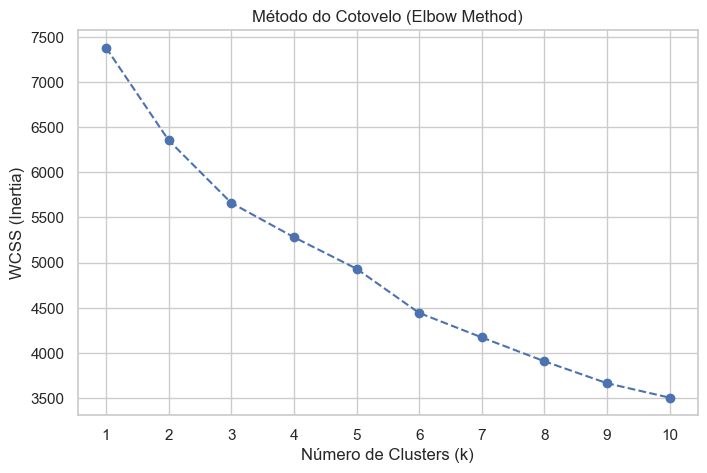

In [49]:
#  Determinar o Número Ótimo de Clusters (k)
#  Método do Cotovelo (Elbow Method)
print("\nCalculando WCSS para o Método do Cotovelo...")
wcss = []
k_range = range(1, 11) # Testar de 1 a 10 clusters

for i in k_range:
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_elbow.fit(X_cluster)
    wcss.append(kmeans_elbow.inertia_) 

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Calculando Coeficiente de Silhueta Médio...


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

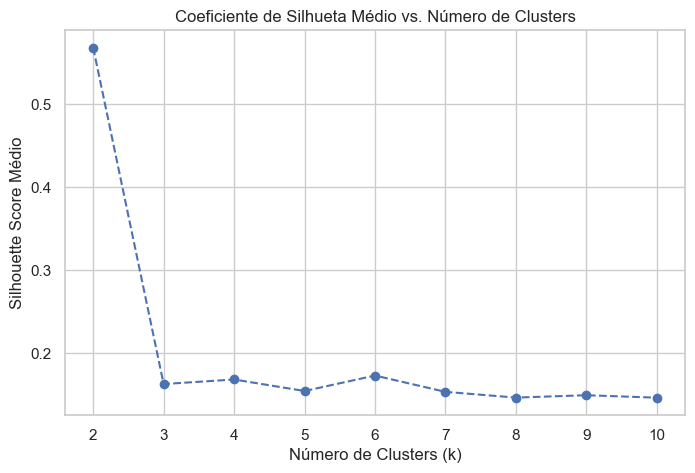

In [50]:
#  Coeficiente de Silhueta (Silhouette Score)
print("\nCalculando Coeficiente de Silhueta Médio...")
silhouette_avg = []
# Silhouette score só é definido para k >= 2
k_range_sil = range(2, 11)

for i in k_range_sil:
    kmeans_sil = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels_sil = kmeans_sil.fit_predict(X_cluster)
    silhouette_avg.append(silhouette_score(X_cluster, cluster_labels_sil))

# Plotar o gráfico da silhueta
plt.figure(figsize=(8, 5))
plt.plot(k_range_sil, silhouette_avg, marker='o', linestyle='--')
plt.title('Coeficiente de Silhueta Médio vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score Médio')
plt.xticks(k_range_sil)
plt.grid(True)
plt.show()

In [51]:
#  Escolher k e Aplicar K-Means Final
# Vamos escolher k=2 como um valor razoável inicial.
k_optimal = 2 
print(f"\nValor escolhido para k (número de clusters): {k_optimal}")

kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster)

df_processed['Cluster'] = cluster_labels
df_pca_2d['Cluster'] = cluster_labels

print(f"\nEtiquetas de cluster adicionadas aos DataFrames 'df_processed' e 'df_pca_2d'.")
print("Distribuição dos dados pelos clusters:")
print(df_processed['Cluster'].value_counts().sort_index())


Valor escolhido para k (número de clusters): 2

Etiquetas de cluster adicionadas aos DataFrames 'df_processed' e 'df_pca_2d'.
Distribuição dos dados pelos clusters:
Cluster
0    579
1     36
Name: count, dtype: int64


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [77]:
# Análise e Interpretação dos Clusters
print(f"\n--- Análise das Características Médias por Cluster (k={k_optimal}) ---")
# Selecionar colunas numéricas originais + Sex_m para análise
cols_for_analysis = df_processed.select_dtypes(include=np.number).columns
# Excluir a própria coluna 'Cluster' da análise de médias
cols_for_analysis = cols_for_analysis.drop('Cluster')

cluster_analysis_mean = df_processed.groupby('Cluster')[cols_for_analysis].mean()
print("\nMédias das features por cluster:")
print(cluster_analysis_mean)


--- Análise das Características Médias por Cluster (k=2) ---

Médias das features por cluster:
               Age        ALB        ALP        ALT         AST        BIL  \
Cluster                                                                      
0        46.827288  42.369862  66.562694  28.455095   30.479275   8.952504   
1        56.750000  29.572222  94.925000  28.230556  104.058333  50.708333   

              CHE      CHOL        CREA         GGT       PROT     Sex_m  
Cluster                                                                   
0        8.449154  5.452953   78.439551   32.680829  72.545769  0.606218  
1        4.135278  3.984444  127.097222  149.741667  63.980556  0.722222  



--- Visualização dos Clusters (k=2) no Espaço PCA 2D ---


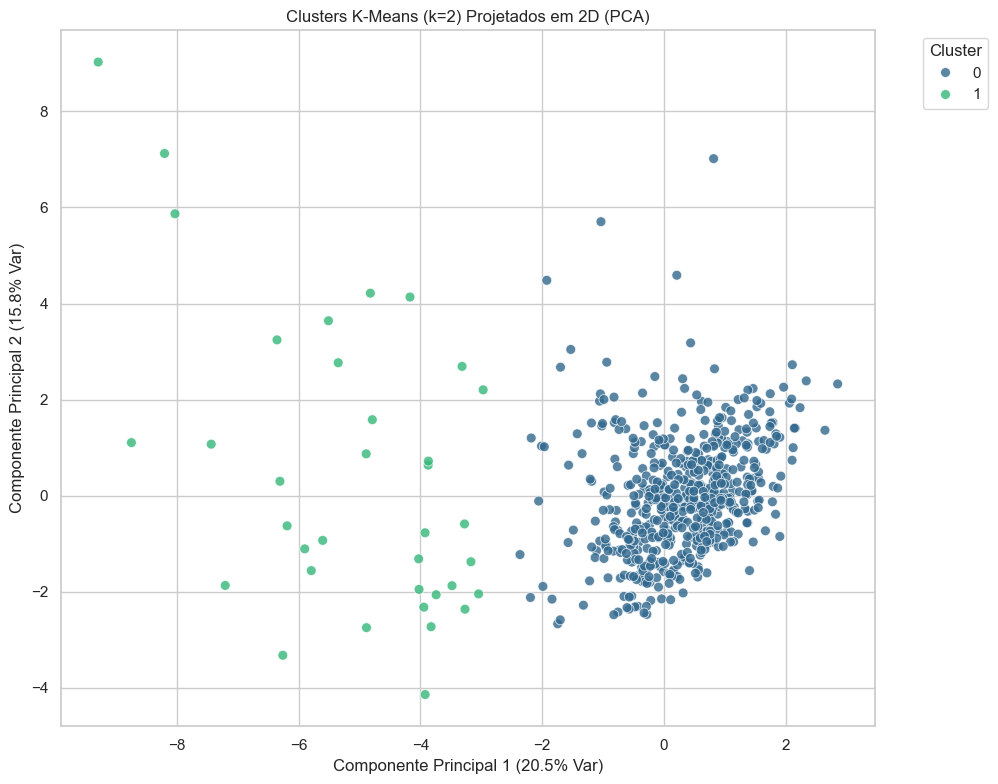

In [78]:
#  Visualização dos Clusters no Espaço PCA 2D
print(f"\n--- Visualização dos Clusters (k={k_optimal}) no Espaço PCA 2D ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', alpha=0.8, palette='viridis', s=50) 
plt.title(f'Clusters K-Means (k={k_optimal}) Projetados em 2D (PCA)')
plt.xlabel(f'Componente Principal 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% Var)')
plt.ylabel(f'Componente Principal 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% Var)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


--- Comparação: Clusters Encontrados vs. Categoria Original (k=2) ---

Tabela de Contingência (Linhas: Categoria Real, Colunas: Cluster Atribuído):
Cluster                   0   1
Category                       
0=Blood Donor           529   4
0s=suspect Blood Donor    1   6
1=Hepatitis              22   2
2=Fibrosis               20   1
3=Cirrhosis               7  23


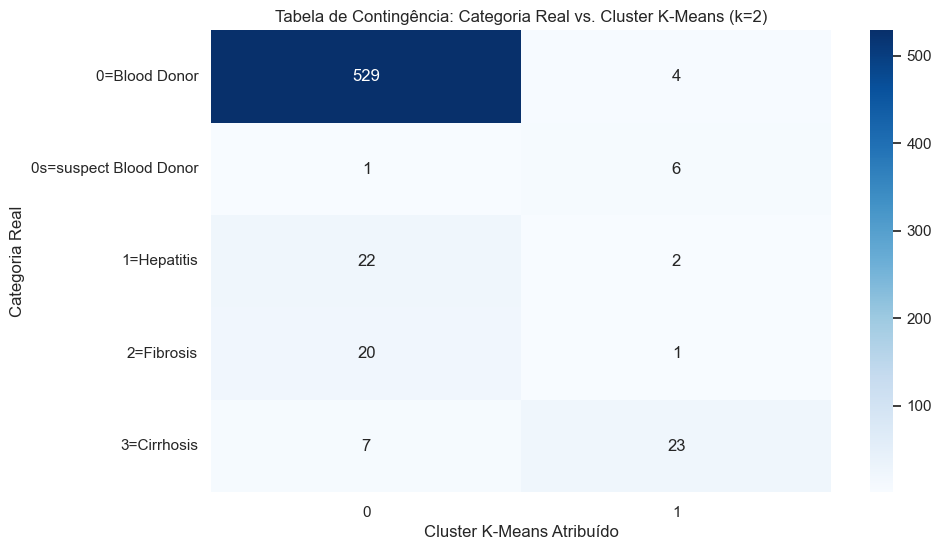

In [79]:
# Analisar medianas (mais robusto a outliers)
if y_true is not None:
    print(f"\n--- Comparação: Clusters Encontrados vs. Categoria Original (k={k_optimal}) ---")
    # Criar tabela de contingência (crosstab)
    contingency_table = pd.crosstab(y_true, df_processed['Cluster'])
    print("\nTabela de Contingência (Linhas: Categoria Real, Colunas: Cluster Atribuído):")
    print(contingency_table)

    # Visualizar a tabela de contingência como heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues') # 'd' para formato inteiro
    plt.title(f'Tabela de Contingência: Categoria Real vs. Cluster K-Means (k={k_optimal})')
    plt.ylabel('Categoria Real')
    plt.xlabel('Cluster K-Means Atribuído')
    plt.show()
else:
    print("\nAnálise de crosstab pulada pois 'y_true' não está disponível.")

### 1. K-Means Clustering

*   **Seleção de Hiperparâmetros (`k`):**
    *   O Método do Cotovelo (Elbow Method) não apresentou um ponto de inflexão ("cotovelo") claro, sugerindo ambiguidades entre k=2, 3 ou 4.
    *   O Coeficiente de Silhueta Médio mostrou um **pico distinto e significativamente mais alto para k=2** (valor > 0.55), indicando que uma partição em dois clusters é a mais coesa e bem separada métricamente. **Portanto, `k=2` foi selecionado.**
*   **Resultados (k=2):**
    *   O algoritmo K-Means dividiu os dados em dois clusters com características médias distintas (idade, marcadores hepáticos como ALP, AST, BIL, GGT, etc.).
    *   **Alinhamento com Categorias Reais:** A Tabela de Contingência revelou um bom alinhamento:
        *   **Cluster 0:** Conteve a esmagadora maioria dos 'Blood Donor' (529/533).
        *   **Cluster 1:** Agrupou a maioria dos indivíduos das categorias 'suspect Blood Donor', 'Hepatitis', 'Fibrosis' e 'Cirrhosis'.
    *   **Visualização (PCA):** O gráfico PCA mostrou os dois clusters, confirmando a separação encontrada, embora com alguma sobreposição na fronteira.

<a id="dbscan"></a>
### 5.2 DBSCAN

In [55]:
print("--- Iniciando Clustering com DBSCAN ---")

--- Iniciando Clustering com DBSCAN ---


In [56]:
#  Escolher os dados para Clustering
X_cluster = scaled_features
print(f"Dados a serem usados para DBSCAN: array com shape {X_cluster.shape}")

Dados a serem usados para DBSCAN: array com shape (615, 12)


In [57]:
#  Escolher min_samples 
D = X_cluster.shape[1]
chosen_min_samples = 2 * D
print(f"\n--- Escolha de Hiperparâmetros ---")
print(f"Dimensionalidade (D): {D}")
print(f"Escolha para min_samples (2*D): {chosen_min_samples}")


--- Escolha de Hiperparâmetros ---
Dimensionalidade (D): 12
Escolha para min_samples (2*D): 24



Calculando distâncias para os 24 vizinhos...


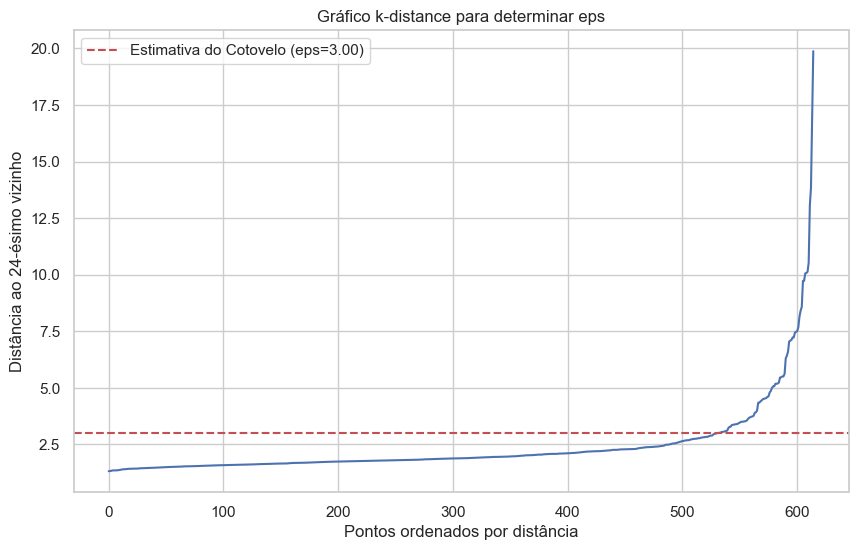


Escolha para eps (baseado no cotovelo): 3.00


In [58]:
#  Escolher eps usando o gráfico k-distance 
k_neighbors = chosen_min_samples
print(f"\nCalculando distâncias para os {k_neighbors} vizinhos...")
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(X_cluster)
distances, indices = nbrs.kneighbors(X_cluster)
k_distances = distances[:, k_neighbors-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances_sorted)
plt.xlabel("Pontos ordenados por distância")
plt.ylabel(f"Distância ao {k_neighbors}-ésimo vizinho")
plt.title("Gráfico k-distance para determinar eps")
plt.grid(True)


elbow_guess = 3.0 # ！！！
plt.axhline(y=elbow_guess, color='r', linestyle='--', label=f'Estimativa do Cotovelo (eps={elbow_guess:.2f})')
plt.legend()
plt.show()

chosen_eps = elbow_guess 
print(f"\nEscolha para eps (baseado no cotovelo): {chosen_eps:.2f}")

In [82]:
# Aplicar DBSCAN com os hiperparâmetros escolhidos
print(f"\nAplicando DBSCAN com eps={chosen_eps:.2f} e min_samples={chosen_min_samples}...")
dbscan_model = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
dbscan_model.fit(X_cluster)
# Extrair as labels (similar ao professor: labels = db.labels_)
dbscan_labels = dbscan_model.labels_
# Identificar core samples (opcional, mas como no exemplo 1 do professor)
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
if hasattr(dbscan_model, 'core_sample_indices_'): # Verificar se o atributo existe
    core_samples_mask[dbscan_model.core_sample_indices_] = True
    n_core_samples = len(dbscan_model.core_sample_indices_)
    print(f"Número de core samples encontrados: {n_core_samples}")
else:
    print("Não foi possível obter core_sample_indices_ diretamente do modelo.")


Aplicando DBSCAN com eps=3.00 e min_samples=24...
Número de core samples encontrados: 531


In [83]:
# Preparar DataFrame para Plotting (no espaço PCA 2D)
dbscan_plot_df = df_pca_2d.copy()
dbscan_plot_df['DBSCAN_Cluster'] = dbscan_labels
# Analisar resultados
unique_labels = set(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f"\n--- Resultados do DBSCAN ---")
print(f"Número estimado de clusters: {n_clusters_dbscan}")
print(f"Número estimado de pontos de ruído (-1): {n_noise_dbscan}")
print(f"Distribuição das amostras (rótulo -1 é ruído):")
print(dbscan_plot_df['DBSCAN_Cluster'].value_counts().sort_index())

# Separar outliers para plot 
outliers_df = dbscan_plot_df[dbscan_plot_df['DBSCAN_Cluster'] == -1]
clusters_df = dbscan_plot_df[dbscan_plot_df['DBSCAN_Cluster'] != -1]


--- Resultados do DBSCAN ---
Número estimado de clusters: 1
Número estimado de pontos de ruído (-1): 52
Distribuição das amostras (rótulo -1 é ruído):
DBSCAN_Cluster
-1     52
 0    563
Name: count, dtype: int64



--- Visualização dos Clusters DBSCAN no Espaço PCA 2D ---


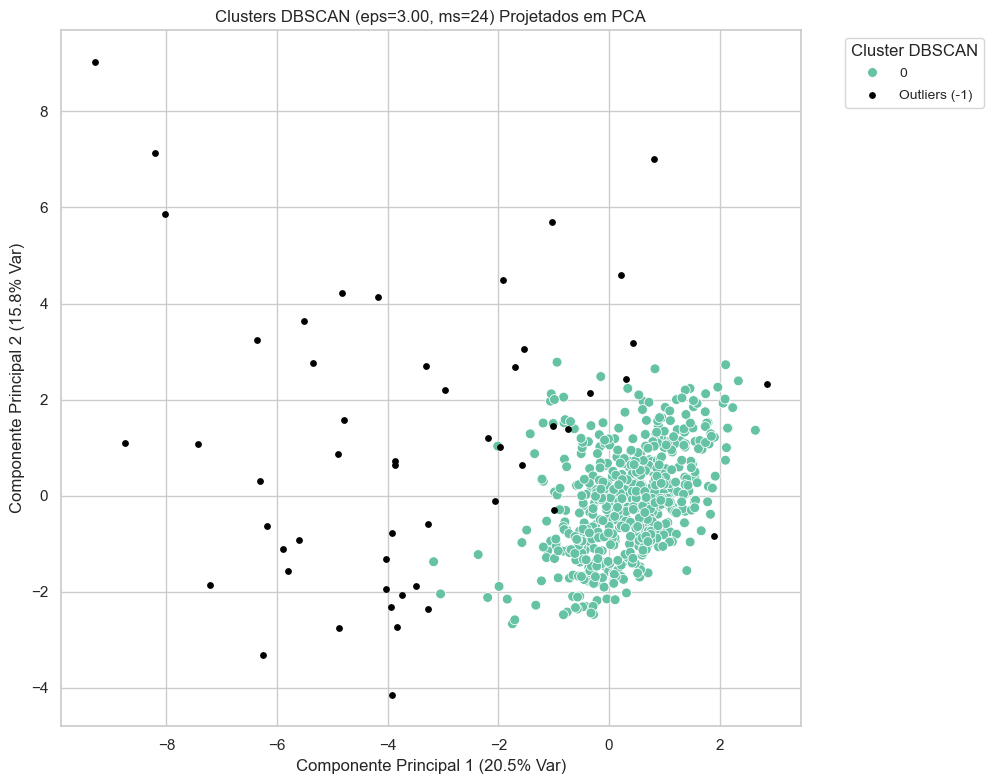

In [84]:
#  Visualização 
print(f"\n--- Visualização dos Clusters DBSCAN no Espaço PCA 2D ---")
fig, ax = plt.subplots(1, 1, figsize=(12, 8)) 
sns.scatterplot(x='PC1', y='PC2',
                data=clusters_df,
                hue='DBSCAN_Cluster',
                palette='Set2', 
                legend='full',
                s=50, 
                ax=ax)
# Plotar os outliers separadamente
ax.scatter(outliers_df['PC1'], outliers_df['PC2'],
           s=15, 
           label='Outliers (-1)',
           c="black") 
# Configurar título e legendas
ax.set_title(f'Clusters DBSCAN (eps={chosen_eps:.2f}, ms={chosen_min_samples}) Projetados em PCA')
ax.set_xlabel(f'Componente Principal 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% Var)')
ax.set_ylabel(f'Componente Principal 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% Var)')

ax.legend(title='Cluster DBSCAN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='10') 
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()


--- Comparação DBSCAN: Clusters Encontrados vs. Categoria Original ---

Tabela de Contingência DBSCAN (Linhas: Categoria Real, Colunas: Cluster Atribuído [-1=Ruído]):
DBSCAN_Cluster          -1    0
Category                       
0=Blood Donor            6  527
0s=suspect Blood Donor   7    0
1=Hepatitis              6   18
2=Fibrosis               7   14
3=Cirrhosis             26    4


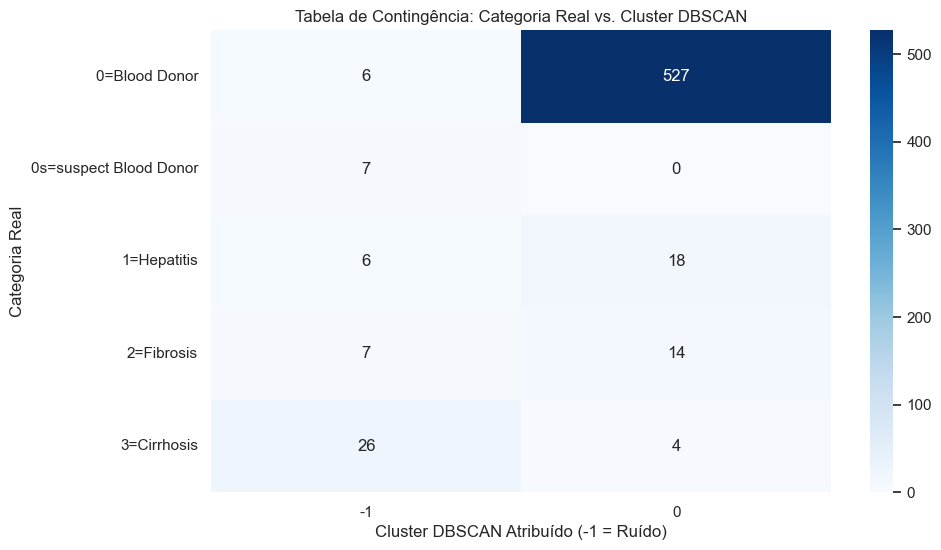

In [62]:
#  Comparar com Categorias Originais
if y_true_exists:
    print(f"\n--- Comparação DBSCAN: Clusters Encontrados vs. Categoria Original ---")
    contingency_table_dbscan = pd.crosstab(y_true, dbscan_plot_df['DBSCAN_Cluster'])
    print("\nTabela de Contingência DBSCAN (Linhas: Categoria Real, Colunas: Cluster Atribuído [-1=Ruído]):")
    print(contingency_table_dbscan)

    # Heatmap 
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table_dbscan, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Tabela de Contingência: Categoria Real vs. Cluster DBSCAN')
    plt.ylabel('Categoria Real')
    plt.xlabel('Cluster DBSCAN Atribuído (-1 = Ruído)')
    plt.show()

### 2. DBSCAN Clustering

*   **Seleção de Hiperparâmetros (`eps`, `min_samples`):**
    *   O gráfico k-distance (para k=24 vizinhos) sugeriu um "cotovelo" em torno de `eps=3.00`.
    *   O número mínimo de amostras foi definido como `min_samples=24` (conforme legenda PCA)
*   **Resultados (eps=3.00, ms=24):**
    *   O DBSCAN identificou **um cluster denso principal (Cluster 0)** e classificou um número considerável de pontos como **ruído/outliers (Cluster -1)**.
    *   **Alinhamento com Categorias Reais:** A Tabela de Contingência mostrou que:
        *   **Cluster 0:** Correspondeu quase exclusivamente ao núcleo dos 'Blood Donor' (527/533).
        *   **Cluster -1 (Outliers):** Incluiu a maioria dos indivíduos das categorias 'suspect Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', e alguns 'Blood Donor' atípicos.
    *   **Visualização (PCA):** O gráfico PCA evidenciou o Cluster 0 como um grupo denso e os outliers (-1) como pontos mais dispersos, correspondendo visualmente às observações da Tabela de Contingência.

<a id="clustering-hierarquico"></a>
### 5.3 Clustering Hierarquico

In [63]:
print("--- Iniciando Clustering Hierárquico Aglomerativo ---")

--- Iniciando Clustering Hierárquico Aglomerativo ---


In [64]:
# Escolher os dados para Clustering
X_cluster = scaled_features
print(f"Dados a serem usados para clustering: array com shape {X_cluster.shape}")

Dados a serem usados para clustering: array com shape (615, 12)


In [65]:
# Calcular a Matriz de Ligação (Linkage Matrix)
print("\nCalculando a matriz de ligação (linkage) usando o método 'ward'...")
linked = linkage(X_cluster, method='ward')


Calculando a matriz de ligação (linkage) usando o método 'ward'...


Plotando o dendrograma truncado (p=3 níveis)...
Linha de corte em y=35 sugere aproximadamente 3 clusters.


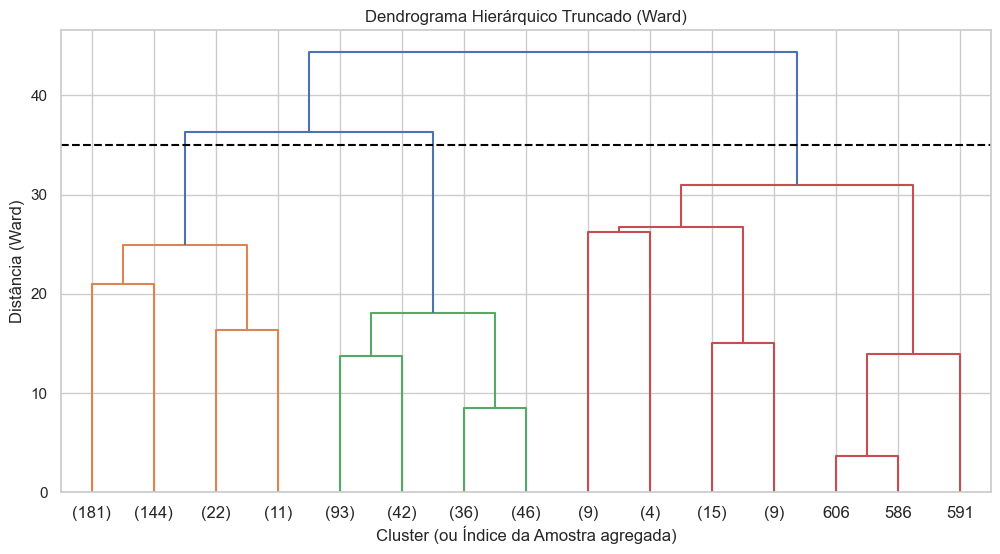

In [85]:
#  Plotar Dendrograma 
p_levels = 3 

# Ou p_last_merges = 15 # Mostrar os últimos p merges (útil para ver os clusters finais ?)
print(f"Plotando o dendrograma truncado (p={p_levels} níveis)...")
plt.figure(figsize=(12, 6)) 
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    truncate_mode='level',
    p=p_levels,
    show_leaf_counts=True 
)
plt.title('Dendrograma Hierárquico Truncado (Ward)')
plt.xlabel('Cluster (ou Índice da Amostra agregada)')
plt.ylabel('Distância (Ward)')

cutoff_height = 35 
plt.axhline(y=cutoff_height, color='black', linestyle='--')
n_clusters_suggested = np.count_nonzero(linked[:, 2] > cutoff_height) + 1 # Calcula k para o corte
print(f"Linha de corte em y={cutoff_height} sugere aproximadamente {n_clusters_suggested} clusters.")
plt.show()

In [67]:
k_hierarchical = 3 
print(f"\nAplicando Agglomerative Clustering para obter k={k_hierarchical} clusters...")

clustering_hier = AgglomerativeClustering(n_clusters=k_hierarchical, linkage='ward') 
hierarchical_labels = clustering_hier.fit_predict(X_cluster)


Aplicando Agglomerative Clustering para obter k=3 clusters...


In [68]:
# Preparar DataFrame para Plotting com Plotly Express
# Adicionar labels ao DataFrame PCA 2D (similar ao professor, convertendo para string)
df_plotly_hier = df_pca_2d.copy()
df_plotly_hier['Cluster'] = hierarchical_labels.astype(str) 

print(f"\n--- Resultados do Clustering Hierárquico (k={k_hierarchical}) ---")
print(f"Distribuição das amostras pelos clusters:")
print(df_plotly_hier['Cluster'].value_counts().sort_index())


--- Resultados do Clustering Hierárquico (k=3) ---
Distribuição das amostras pelos clusters:
Cluster
0     40
1    358
2    217
Name: count, dtype: int64



--- Visualização dos Clusters Hierárquicos (k=3) com Plotly Express ---


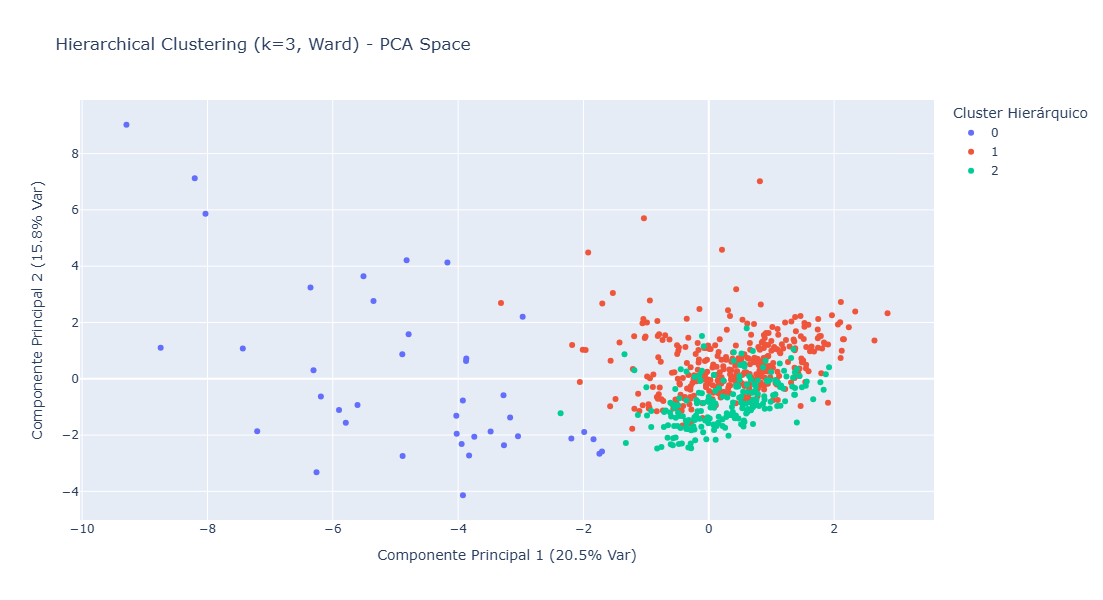

In [86]:
#  Visualização com Plotly Express (no espaço PCA 2D)
print(f"\n--- Visualização dos Clusters Hierárquicos (k={k_hierarchical}) com Plotly Express ---")
fig = px.scatter(df_plotly_hier,
                 x='PC1',
                 y='PC2',
                 color="Cluster", 
                 title=f"Hierarchical Clustering (k={k_hierarchical}, Ward) - PCA Space",
                 width=800, height=600,
                 category_orders={"Cluster": sorted(df_plotly_hier['Cluster'].unique())} # Garante ordem na legenda
                )
fig.update_layout(
    xaxis_title=f'Componente Principal 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% Var)',
    yaxis_title=f'Componente Principal 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% Var)',
    legend_title="Cluster Hierárquico"
)
fig.show()


--- Comparação Hierárquica: Clusters Encontrados (k=3) vs. Categoria Original ---

Tabela de Contingência Hierárquica (Linhas: Categoria Real, Colunas: Cluster Atribuído):
Cluster                  0    1    2
Category                            
0=Blood Donor            9  318  206
0s=suspect Blood Donor   6    1    0
1=Hepatitis              2   19    3
2=Fibrosis               0   16    5
3=Cirrhosis             23    4    3


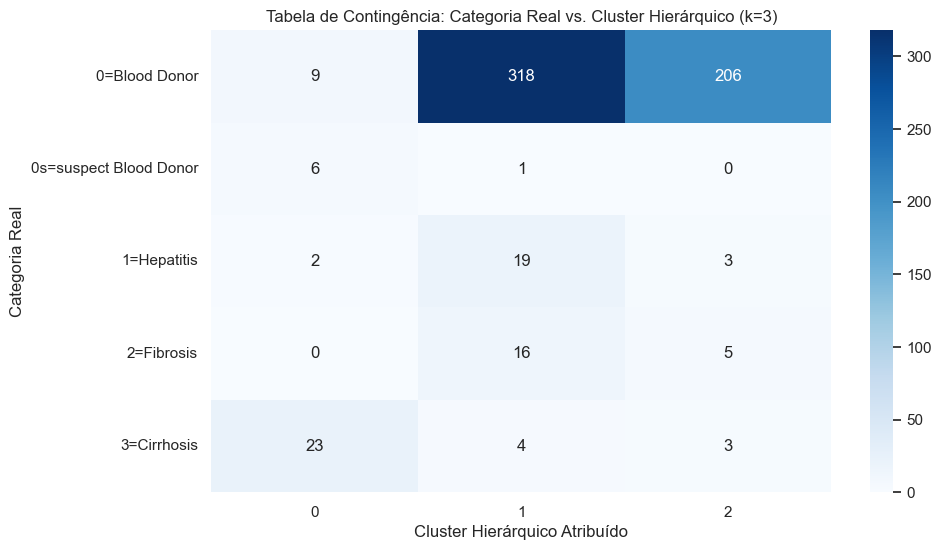

In [70]:
#  Comparar com Categorias Originais
if y_true_exists:
    print(f"\n--- Comparação Hierárquica: Clusters Encontrados (k={k_hierarchical}) vs. Categoria Original ---")
    # Usar df_plotly_hier que tem a coluna 'Cluster' correta
    contingency_table_hier = pd.crosstab(y_true, df_plotly_hier['Cluster'])
    print("\nTabela de Contingência Hierárquica (Linhas: Categoria Real, Colunas: Cluster Atribuído):")
    print(contingency_table_hier)

    # Heatmap 
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table_hier, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Tabela de Contingência: Categoria Real vs. Cluster Hierárquico (k={k_hierarchical})')
    plt.ylabel('Categoria Real')
    plt.xlabel('Cluster Hierárquico Atribuído')
    plt.show()

## 3. Clustering Hierárquico (k=3, Ward)

Aplicámos Clustering Hierárquico (método Ward) e, com base no dendrograma (corte a y=35), selecionámos **k=3 clusters**.

*   **Cluster 0 (40 amostras):** Conseguiu isolar a maioria dos casos de **Cirrose** (23 de 30).
*   **Cluster 1 (358 amostras):** O maior grupo, misturou a maioria dos **Dadores de Sangue** (318) com a maioria dos casos de **Hepatite**, **Fibrose** e **Suspeitos**.
*   **Cluster 2 (217 amostras):** Composto quase exclusivamente por **Dadores de Sangue** (206), sugerindo um possível subgrupo dentro dos indivíduos saudáveis.

**Comparação com K-Means (k=2) e DBSCAN:**
*   **vs. K-Means (k=2):** O K-Means separou Dadores (Cluster 0 K-Means) de Não-Dadores (Cluster 1 K-Means). O método hierárquico com k=3 foi mais além: isolou a maioria da Cirrose (no Cluster 0 hierárquico), mas agrupou a maioria dos Dadores, Hepatite, Fibrose e Suspeitos juntos (no Cluster 1 hierárquico), e ainda criou um segundo cluster (Cluster 2 hierárquico) composto quase só por Dadores. A separação da Cirrose é um ganho em relação ao K-Means k=2.
*   **vs. DBSCAN:** DBSCAN isolou o núcleo denso dos Dadores (Cluster 0 DBSCAN) e classificou quase todos os outros como ruído (-1). O método hierárquico, ao contrário, forçou todos os pontos a pertencer a um cluster. O Cluster 0 hierárquico (Cirrose) corresponde a uma parte do que era ruído no DBSCAN. Os Clusters 1 e 2 hierárquicos juntos cobrem o que era o Cluster 0 (Dadores) e o restante do ruído do DBSCAN.

---

### Tabela de Comparação Final das Técnicas Aplicadas

| Técnica         | Tipo                     | Objetivo Principal (Neste Estudo) | Parâmetros Chave (Usados)           | Sensibilidade a Parâmetros | Capacidade de Visualização (2D) | Separação de Categorias (Observada)          | Tratamento de Outliers | Principal Insight Obtido (Neste Dataset)                                                                    |
| :-------------- | :----------------------- | :-------------------------------- | :---------------------------------- | :------------------------- | :------------------------------ | :------------------------------------------- | :--------------------- | :---------------------------------------------------------------------------------------------------------- |
| **PCA**         | Red. Dimensionalidade    | Visualização (Baseline)           | Nenhum (n_components=2 para plot) | Baixa                      | Limitada                        | Fraca (Linear), sobreposição                 | Não aplicável          | Maior variância linear não separa bem; baixa variância explicada em 2D (~36.3%).                            |
| **t-SNE**       | Red. Dimensionalidade    | Visualização                      | `perplexity=55`                     | Média (perplexity)         | Boa                             | Razoável (Não-linear), alguma separação      | Não aplicável          | Revela estrutura não-linear; começa a separar Fib/Cirr, foco local.                                         |
| **UMAP**        | Red. Dimensionalidade    | Visualização                      | `n_neighbors=15`, `min_dist=0.1`    | Média (n_neigh, min_dist)  | Excelente                       | Boa/Excelente (Não-linear), esp. Fib/Cirr    | Não aplicável          | Melhor visualização; clusters compactos para Fib/Cirr; equilibra estrutura local/global.                     |
| **K-Means**     | Clustering               | Particionamento em k grupos       | `k=2` (via Silhueta)                | Média (k)                  | Indireta (via PCA)              | Razoável (Dador vs. Outros)                  | Inclui nos clusters    | Encontra partição binária ótima (Silhueta); não separa estágios da doença.                                |
| **DBSCAN**      | Clustering               | Baseado em Densidade              | `eps=3.00`, `min_samples=24`        | Alta (eps, min_samples)    | Indireta (via PCA)              | Razoável (Núcleo Dador vs. Outros como ruído) | Identifica como ruído  | Isola núcleo denso de Dadores; classifica maioria dos outros como ruído.                            |
| **Hierárquico** | Clustering               | Hierarquia / k grupos             | `k=3`, `linkage='ward'`             | Média (k, linkage)         | Indireta (via PCA/Dendrograma)  | **Boa para Cirrose**; outras misturadas      | Inclui nos clusters    | **Isolou maioria da Cirrose (k=3)**; agrupou Dadores/Hepatite/Fibrose; criou 2º cluster de dadores. |

## 6.Conclusão

A exploração não supervisionada do dataset HCV revelou insights chave sobre a sua estrutura. A redução de dimensionalidade não-linear (especialmente **UMAP**) foi crucial para visualizar a separação potencial entre grupos, superando a PCA e mostrando clusters distintos para os estágios avançados da doença (Fibrose/Cirrose).

No **clustering**, três abordagens foram comparadas. **Para visualizar e comparar como cada algoritmo particionou os dados, projetámos os resultados de volta no mesmo espaço bidimensional da PCA (PC1 vs PC2). Esta abordagem permite uma comparação direta sobre a estrutura de maior variância revelada pela PCA, apesar de se reconhecer que esta projeção explica apenas 36.3% da variância total e que as visualizações UMAP/t-SNE  oferecem uma separação visual mais nítida dos grupos. Neste espaço PCA:**

1.  **K-Means (k=2):** Guiado pela métrica do Coeficiente de Silhueta, identificou a divisão binária mais forte (Dador vs. Não-Dador), mas agrupou todos os estágios da doença.
2.  **DBSCAN (eps=3.0, ms=24):** Focado na densidade, isolou com sucesso o núcleo denso dos Dadores (Cluster 0), mas classificou a grande maioria dos pacientes e suspeitos como ruído/outliers (Cluster -1).
3.  **Hierárquico (Ward, k=3):** Cortando o dendrograma de forma a obter 3 clusters, ofereceu um resultado clinicamente interessante ao conseguir **isolar a maioria dos casos de Cirrose** num cluster dedicado (Cluster 0), embora ainda misturasse os outros estágios com Dadores (Cluster 1) e criasse um segundo cluster de Dadores (Cluster 2).

**Para concluir,** a análise confirmou que a distinção Dador vs. Não-Dador é a estrutura dominante nos dados, facilmente capturada por todos os métodos de clustering. No entanto, a separação automática entre os estágios da doença (Hepatite, Fibrose, Cirrose) foi desafiadora com os parâmetros usados. O sucesso parcial do método Hierárquico em isolar a Cirrose e as visualizações claras do UMAP sugerem que existem padrões de progressão da doença, mas capturá-los completamente talvez exige abordagens de clustering mais específicas ou modelos supervisionados.
